In [6]:
#importing data after clean up in OpenRefine
#removed entires with missing important values such as budget, revenue, title etc. 
#removed movies released before 1990
#removed all movies that don't include english language 
# minor fixes regarding foregin laguage sings and encoding
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import matplotlib.patches as mpatches

data = pd.read_csv('movies-refined-X.csv')
data.shape
display(data)

,imdb_title_id,title,year,genre,duration,country,language,director,production_company,budget,usa_gross_income,worlwide_gross_income
0,tt0035423,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,Konrad Pictures,48000000,47121859,76019048
1,tt0098375,Spontaneous Combustion,1990,"Horror, Sci-Fi, Thriller",97,USA,English,Tobe Hooper,Black Owl Productions,5500000,50367,50367
2,tt0098987,The Adventures of Ford Fairlane,1990,"Action, Adventure, Comedy",104,USA,English,Renny Harlin,Twentieth Century Fox,20000000,21413502,21413502
3,tt0099005,Air America,1990,"Action, Comedy, War",113,USA,"English, Lao",Roger Spottiswoode,Carolco Pictures,35000000,31053601,33461269
4,tt0099012,Alice,1990,"Comedy, Romance",106,USA,"English, Cantonese",Woody Allen,Jack Rollins & Charles H. Joffe Productions,12000000,7331647,7331647
...,...,...,...,...,...,...,...,...,...,...,...,...
5388,tt8663516,Child's Play,2019,Horror,90,"France, Canada, USA","English, Vietnamese",Lars Klevberg,Orion Pictures,10000000,29208403,44902237
5389,tt8772262,Midsommar,2019,"Drama, Horror, Mystery",147,"USA, Sweden, Hungary","English, Swedish",Ari Aster,Proton Cinema,10000000,27426361,41123770
5390,tt9024106,Unplanned,2019,"Biography, Drama",109,USA,English,"Chuck Konzelman, Cary Solomon",Unplanned Movie,6000000,19005109,19320481
5391,tt9134216,Playing with Fire,2019,"Comedy, Family",96,USA,English,Andy Fickman,Broken Road Productions,29900000,18847824,21788746


In [7]:
income = data.worlwide_gross_income

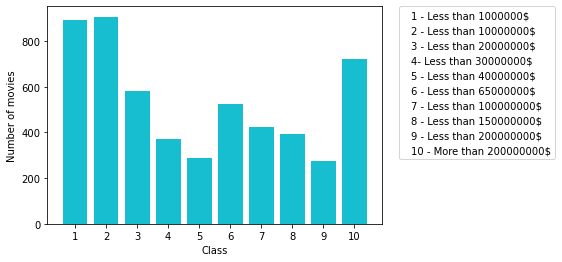

In [8]:
#visualizing movie distribution by revenue
classes = [0]*10
for inc in income:
    if inc <= 1000000:
        classes[0]+=1
    elif inc <= 10000000:
        classes[1]+=1
    elif inc <= 20000000:
        classes[2]+=1
    elif inc <= 30000000:
        classes[3]+=1
    elif inc <= 40000000:
        classes[4]+=1
    elif inc <= 65000000:
        classes[5]+=1
    elif inc <= 100000000:
        classes[6]+=1
    elif inc <= 150000000:
        classes[7]+=1
    elif inc <= 200000000:
        classes[8]+=1
    else:
        classes[9]+=1
        
        pt.bar(np.arange(10), classes)
        
pt.xticks(np.arange(10), np.arange(1,11))
pt.xlabel('Class')
pt.ylabel('Number of movies')
pt.rcParams['legend.handlelength'] = 0
pt.legend(('1 - Less than 1000000$','2 - Less than 10000000$','3 - Less than 20000000$','4- Less than 30000000$',
           '5 - Less than 40000000$','6 - Less than 65000000$','7 - Less than 100000000$',
           '8 - Less than 150000000$','9 - Less than 200000000$','10 - More than 200000000$'),
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pt.show()

In [9]:
#Adding GDP and GDP growth data to dataframe
    
con =  [
        (data['year'] == 1990),
        (data['year'] == 1991),
        (data['year'] == 1992),
        (data['year'] == 1993),
        (data['year'] == 1994),
        (data['year'] == 1995),
        (data['year'] == 1996),
        (data['year'] == 1997),
        (data['year'] == 1998),
        (data['year'] == 1999),
        (data['year'] == 2000),
        (data['year'] == 2001),
        (data['year'] == 2002),
        (data['year'] == 2003),
        (data['year'] == 2004),
        (data['year'] == 2005),
        (data['year'] == 2006),
        (data['year'] == 2007),
        (data['year'] == 2008),
        (data['year'] == 2009),
        (data['year'] == 2010),
        (data['year'] == 2011),
        (data['year'] == 2012),
        (data['year'] == 2013),
        (data['year'] == 2014),
        (data['year'] == 2015),
        (data['year'] == 2016),
        (data['year'] == 2017),
        (data['year'] == 2018),
        (data['year'] == 2019)]


GDP1 =[9.366,9.355,9.685,9.952,10.352,10.63,11.031,11.522,12.038,12.611,13.131,13.262,13.493,13.879,14.406,
            14.913,15.338,15.626,15.605,15.209,15.599,15.841,16.197,16.495,16.912,17.404,17.689,18.108,18.638,19.073]
GDP2 = [1.9,-0.1,3.5,2.8,4.0,2.7,3.8,4.4,4.5,4.8,4.1,1.0,1.7,2.9,3.8,3.5,2.9,1.9,-0.1,-2.5,2.6,1.6,2.2,1.8,2.5,2.9,1.6,2.4,2.9,2.3]

                  
data['Real GDP (trillions $)'] =np.select(con,GDP1)
data['GDP Growth Rate %'] =np.select(con,GDP2)
data.head()

,imdb_title_id,title,year,genre,duration,country,language,director,production_company,budget,usa_gross_income,worlwide_gross_income,Real GDP (trillions $),GDP Growth Rate %
0,tt0035423,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,Konrad Pictures,48000000,47121859,76019048,13.262,1.0
1,tt0098375,Spontaneous Combustion,1990,"Horror, Sci-Fi, Thriller",97,USA,English,Tobe Hooper,Black Owl Productions,5500000,50367,50367,9.366,1.9
2,tt0098987,The Adventures of Ford Fairlane,1990,"Action, Adventure, Comedy",104,USA,English,Renny Harlin,Twentieth Century Fox,20000000,21413502,21413502,9.366,1.9
3,tt0099005,Air America,1990,"Action, Comedy, War",113,USA,"English, Lao",Roger Spottiswoode,Carolco Pictures,35000000,31053601,33461269,9.366,1.9
4,tt0099012,Alice,1990,"Comedy, Romance",106,USA,"English, Cantonese",Woody Allen,Jack Rollins & Charles H. Joffe Productions,12000000,7331647,7331647,9.366,1.9


In [10]:
data.to_csv('movies-ref-GDP.csv')

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import matplotlib.patches as mpatches

#data = pd.read_csv('movies-ref-GDP.csv')
data = pd.read_csv('movies-ref-GDP-csv.csv')
data.shape

(5393, 15)

In [12]:
#Splitting genre object, turning it to binary through get_dummies and concat with the oryginal dataframe

binary=data.genre.str.get_dummies(sep=', ')
data = pd.concat([data, binary], axis = 1)
display(binary)
display(data)

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5389,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
5390,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5391,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


,Column,imdb_title_id,title,year,genre,duration,country,language,director,production_company,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,tt0035423,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,Konrad Pictures,...,0,0,0,0,1,0,0,0,0,0
1,1,tt0098375,Spontaneous Combustion,1990,"Horror, Sci-Fi, Thriller",97,USA,English,Tobe Hooper,Black Owl Productions,...,1,0,0,0,0,1,0,1,0,0
2,2,tt0098987,The Adventures of Ford Fairlane,1990,"Action, Adventure, Comedy",104,USA,English,Renny Harlin,Twentieth Century Fox,...,0,0,0,0,0,0,0,0,0,0
3,3,tt0099005,Air America,1990,"Action, Comedy, War",113,USA,"English, Lao",Roger Spottiswoode,Carolco Pictures,...,0,0,0,0,0,0,0,0,1,0
4,4,tt0099012,Alice,1990,"Comedy, Romance",106,USA,"English, Cantonese",Woody Allen,Jack Rollins & Charles H. Joffe Productions,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,5388,tt8663516,Child's Play,2019,Horror,90,"France, Canada, USA","English, Vietnamese",Lars Klevberg,Orion Pictures,...,1,0,0,0,0,0,0,0,0,0
5389,5389,tt8772262,Midsommar,2019,"Drama, Horror, Mystery",147,"USA, Sweden, Hungary","English, Swedish",Ari Aster,Proton Cinema,...,1,0,0,1,0,0,0,0,0,0
5390,5390,tt9024106,Unplanned,2019,"Biography, Drama",109,USA,English,"Chuck Konzelman, Cary Solomon",Unplanned Movie,...,0,0,0,0,0,0,0,0,0,0
5391,5391,tt9134216,Playing with Fire,2019,"Comedy, Family",96,USA,English,Andy Fickman,Broken Road Productions,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.drop(['Column','imdb_title_id','genre'], axis=1)

,title,year,duration,country,language,director,production_company,budget,usa_gross_income,worlwide_gross_income,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Kate & Leopold,2001,118,USA,"English, French",James Mangold,Konrad Pictures,48000000,47121859,76019048,...,0,0,0,0,1,0,0,0,0,0
1,Spontaneous Combustion,1990,97,USA,English,Tobe Hooper,Black Owl Productions,5500000,50367,50367,...,1,0,0,0,0,1,0,1,0,0
2,The Adventures of Ford Fairlane,1990,104,USA,English,Renny Harlin,Twentieth Century Fox,20000000,21413502,21413502,...,0,0,0,0,0,0,0,0,0,0
3,Air America,1990,113,USA,"English, Lao",Roger Spottiswoode,Carolco Pictures,35000000,31053601,33461269,...,0,0,0,0,0,0,0,0,1,0
4,Alice,1990,106,USA,"English, Cantonese",Woody Allen,Jack Rollins & Charles H. Joffe Productions,12000000,7331647,7331647,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,Child's Play,2019,90,"France, Canada, USA","English, Vietnamese",Lars Klevberg,Orion Pictures,10000000,29208403,44902237,...,1,0,0,0,0,0,0,0,0,0
5389,Midsommar,2019,147,"USA, Sweden, Hungary","English, Swedish",Ari Aster,Proton Cinema,10000000,27426361,41123770,...,1,0,0,1,0,0,0,0,0,0
5390,Unplanned,2019,109,USA,English,"Chuck Konzelman, Cary Solomon",Unplanned Movie,6000000,19005109,19320481,...,0,0,0,0,0,0,0,0,0,0
5391,Playing with Fire,2019,96,USA,English,Andy Fickman,Broken Road Productions,29900000,18847824,21788746,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data.to_csv('movies-checkpoint_genre_clean.csv')

In [121]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import matplotlib.patches as mpatches

data = pd.read_csv('movies-checkpoint_genre_clean.csv')
data.shape
display(data)

,Unnamed: 0,Column,imdb_title_id,title,year,genre,duration,country,language,director,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,tt0035423,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,0,0,0,0,1,0,0,0,0,0
1,1,1,tt0098375,Spontaneous Combustion,1990,"Horror, Sci-Fi, Thriller",97,USA,English,Tobe Hooper,...,1,0,0,0,0,1,0,1,0,0
2,2,2,tt0098987,The Adventures of Ford Fairlane,1990,"Action, Adventure, Comedy",104,USA,English,Renny Harlin,...,0,0,0,0,0,0,0,0,0,0
3,3,3,tt0099005,Air America,1990,"Action, Comedy, War",113,USA,"English, Lao",Roger Spottiswoode,...,0,0,0,0,0,0,0,0,1,0
4,4,4,tt0099012,Alice,1990,"Comedy, Romance",106,USA,"English, Cantonese",Woody Allen,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,5388,5388,tt8663516,Child's Play,2019,Horror,90,"France, Canada, USA","English, Vietnamese",Lars Klevberg,...,1,0,0,0,0,0,0,0,0,0
5389,5389,5389,tt8772262,Midsommar,2019,"Drama, Horror, Mystery",147,"USA, Sweden, Hungary","English, Swedish",Ari Aster,...,1,0,0,1,0,0,0,0,0,0
5390,5390,5390,tt9024106,Unplanned,2019,"Biography, Drama",109,USA,English,"Chuck Konzelman, Cary Solomon",...,0,0,0,0,0,0,0,0,0,0
5391,5391,5391,tt9134216,Playing with Fire,2019,"Comedy, Family",96,USA,English,Andy Fickman,...,0,0,0,0,0,0,0,0,0,0


In [122]:
#Getting worldwide income sum for unique production companies
pc = data.groupby('production_company', group_keys=False).apply(lambda x: x.loc[x.worlwide_gross_income.idxmax()]).reset_index(drop=True)
pc.drop(pc.columns.difference(['production_company','worlwide_gross_income']), 1, inplace=True)
pc.rename(columns={'worlwide_gross_income':'Sum_production_company_income'}, inplace=True)
display(pc)

,production_company,Sum_production_company_income
0,"""DIA"" Productions GmbH & Co. KG",44350926
1,.406 Production,10580
2,1 Bullet in the Gun Productions,9110
3,100 Acres of Hell Productions,5152
4,10th Hole Productions,123820
...,...,...
1854,here! Films,34646
1855,i am OTHER,17986781
1856,i5 Films,10031529
1857,nWave Pictures,47046281


In [123]:
#Merging oryginal dataframe with unique values (Sum of production company income)
data = pd.merge(data, pc, on=['production_company'])
display(data)

,Unnamed: 0,Column,imdb_title_id,title,year,genre,duration,country,language,director,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Sum_production_company_income
0,0,0,tt0035423,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,0,0,0,1,0,0,0,0,0,76019048
1,1,1,tt0098375,Spontaneous Combustion,1990,"Horror, Sci-Fi, Thriller",97,USA,English,Tobe Hooper,...,0,0,0,0,1,0,1,0,0,50367
2,2,2,tt0098987,The Adventures of Ford Fairlane,1990,"Action, Adventure, Comedy",104,USA,English,Renny Harlin,...,0,0,0,0,0,0,0,0,0,2789968301
3,16,16,tt0099291,Come See the Paradise,1990,"Drama, Romance, War",138,USA,"English, Japanese",Alan Parker,...,0,0,0,1,0,0,0,1,0,2789968301
4,24,24,tt0099423,Die Hard 2,1990,"Action, Thriller",124,USA,"English, Spanish",Renny Harlin,...,0,0,0,0,0,0,1,0,0,2789968301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5365,5382,5382,tt8266310,Blinded by the Light,2019,"Comedy, Drama, Music",118,"UK, USA",English,Gurinder Chadha,...,1,0,0,0,0,0,0,0,0,18019198
5366,5383,5383,tt8267604,CapharnaÄ‚â€žĂ˘â‚¬ĹˇÄ‚â€žĂ‹ĹĄm,2018,Drama,126,"Lebanon, France, USA, Cyprus, Qatar","Arabic, Amharic",Nadine Labaki,...,0,0,0,0,0,0,0,0,0,64398132
5367,5387,5387,tt8623904,Last Christmas,2019,"Comedy, Drama, Romance",103,"UK, USA","English, Croatian",Paul Feig,...,0,0,0,1,0,0,0,0,0,20975765
5368,5389,5389,tt8772262,Midsommar,2019,"Drama, Horror, Mystery",147,"USA, Sweden, Hungary","English, Swedish",Ari Aster,...,0,0,1,0,0,0,0,0,0,41123770


In [124]:
#Getting worldwide income sum for unique Director
dr = data.groupby('director', group_keys=False).apply(lambda x: x.loc[x.worlwide_gross_income.idxmax()]).reset_index(drop=True)
dr.drop(dr.columns.difference(['director','worlwide_gross_income']), 1, inplace=True)
dr.rename(columns={'worlwide_gross_income':'Sum_Director_income'}, inplace=True)
display(dr)

,director,Sum_Director_income
0,A. Raven Cruz,3700
1,A.M. Lukas,3861
2,"Aaron Blaise, Robert Walker",250397798
3,"Aaron Horvath, Peter Rida Michail",52090236
4,Aaron J. Wiederspahn,23457
...,...,...
2527,Ziad Doueiri,3601603
2528,Ziad H. Hamzeh,24997
2529,Zoe R. Cassavetes,1944150
2530,Zoran Lisinac,4586


In [125]:
#Merging oryginal dataframe with unique values (Sum of Director income)
data = pd.merge(data, dr, on=['director'])
display(data)

,Unnamed: 0,Column,imdb_title_id,title,year,genre,duration,country,language,director,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Sum_production_company_income,Sum_Director_income
0,0,0,tt0035423,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,0,0,1,0,0,0,0,0,76019048,619021436
1,3491,3491,tt1013743,Knight and Day,2010,"Action, Adventure, Comedy",109,USA,"English, German, Spanish",James Mangold,...,0,0,0,0,0,0,0,0,2789968301,619021436
2,4009,4009,tt1430132,The Wolverine,2013,"Action, Adventure, Sci-Fi",126,"USA, UK","English, Japanese",James Mangold,...,0,0,0,1,0,0,0,0,2789968301,619021436
3,4924,4924,tt3315342,Logan,2017,"Action, Drama, Sci-Fi",137,USA,"English, Spanish",James Mangold,...,0,0,0,1,0,0,0,0,2789968301,619021436
4,1479,1479,tt0172493,"Girl, Interrupted",1999,"Biography, Drama",127,"USA, Germany",English,James Mangold,...,0,0,0,0,0,0,0,0,1131845802,619021436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,5343,5343,tt7048622,L'insulte,2017,"Crime, Drama, Thriller",113,"France, Cyprus, Belgium, Lebanon, USA",Arabic,Ziad Doueiri,...,0,0,0,0,0,1,0,0,3601603,3601603
5365,5360,5360,tt7374952,El Chicano,2018,Drama,108,USA,English,Ben Hernandez Bray,...,0,0,0,0,0,0,0,0,1404646,1404646
5366,5372,5372,tt7752126,Brightburn,2019,"Drama, Horror, Mystery",90,USA,English,David Yarovesky,...,0,1,0,0,0,0,0,0,32893421,32893421
5367,5383,5383,tt8267604,CapharnaÄ‚â€žĂ˘â‚¬ĹˇÄ‚â€žĂ‹ĹĄm,2018,Drama,126,"Lebanon, France, USA, Cyprus, Qatar","Arabic, Amharic",Nadine Labaki,...,0,0,0,0,0,0,0,0,64398132,64398132


In [126]:
#Adding movie count of a Director as Director_movies
dir_movie = data.groupby(['director']).size().reset_index(name='Director_movies')
prod_movie = data.groupby(['production_company']).size().reset_index(name='Production_company_movies')
display(dir_movie)
display(prod_movie)
data = pd.merge(data, dir_movie, on=['director'])
data = pd.merge(data, prod_movie, on=['production_company'])
display(data)

,director,Director_movies
0,A. Raven Cruz,1
1,A.M. Lukas,1
2,"Aaron Blaise, Robert Walker",1
3,"Aaron Horvath, Peter Rida Michail",1
4,Aaron J. Wiederspahn,1
...,...,...
2527,Ziad Doueiri,1
2528,Ziad H. Hamzeh,1
2529,Zoe R. Cassavetes,1
2530,Zoran Lisinac,1


,production_company,Production_company_movies
0,"""DIA"" Productions GmbH & Co. KG",1
1,.406 Production,1
2,1 Bullet in the Gun Productions,1
3,100 Acres of Hell Productions,1
4,10th Hole Productions,1
...,...,...
1853,here! Films,1
1854,i am OTHER,1
1855,i5 Films,1
1856,nWave Pictures,2


,Unnamed: 0,Column,imdb_title_id,title,year,genre,duration,country,language,director,...,Romance,Sci-Fi,Sport,Thriller,War,Western,Sum_production_company_income,Sum_Director_income,Director_movies,Production_company_movies
0,0,0,tt0035423,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,1,0,0,0,0,0,76019048,619021436,10,1
1,3491,3491,tt1013743,Knight and Day,2010,"Action, Adventure, Comedy",109,USA,"English, German, Spanish",James Mangold,...,0,0,0,0,0,0,2789968301,619021436,10,187
2,4009,4009,tt1430132,The Wolverine,2013,"Action, Adventure, Sci-Fi",126,"USA, UK","English, Japanese",James Mangold,...,0,1,0,0,0,0,2789968301,619021436,10,187
3,4924,4924,tt3315342,Logan,2017,"Action, Drama, Sci-Fi",137,USA,"English, Spanish",James Mangold,...,0,1,0,0,0,0,2789968301,619021436,10,187
4,2,2,tt0098987,The Adventures of Ford Fairlane,1990,"Action, Adventure, Comedy",104,USA,English,Renny Harlin,...,0,0,0,0,0,0,2789968301,255000211,13,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,5343,5343,tt7048622,L'insulte,2017,"Crime, Drama, Thriller",113,"France, Cyprus, Belgium, Lebanon, USA",Arabic,Ziad Doueiri,...,0,0,0,1,0,0,3601603,3601603,1,1
5365,5360,5360,tt7374952,El Chicano,2018,Drama,108,USA,English,Ben Hernandez Bray,...,0,0,0,0,0,0,1404646,1404646,1,1
5366,5372,5372,tt7752126,Brightburn,2019,"Drama, Horror, Mystery",90,USA,English,David Yarovesky,...,0,0,0,0,0,0,32893421,32893421,1,1
5367,5383,5383,tt8267604,CapharnaÄ‚â€žĂ˘â‚¬ĹˇÄ‚â€žĂ‹ĹĄm,2018,Drama,126,"Lebanon, France, USA, Cyprus, Qatar","Arabic, Amharic",Nadine Labaki,...,0,0,0,0,0,0,64398132,64398132,1,1


In [127]:
#cleaning up the dataframe
data.rename(columns={'worlwide_gross_income':'worldwide_gross_income'}, inplace=True)
data=data.drop(['Unnamed: 0','Column','imdb_title_id','genre','title','country','language','production_company','director'], axis=1)

In [128]:
data.to_csv('movies-checkpoint_clean.csv')

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import matplotlib.patches as mpatches
import seaborn as sns
data = pd.read_csv('movies-checkpoint_clean.csv')
data.shape
display(data)

,Unnamed: 0,year,duration,budget,usa_gross_income,worldwide_gross_income,Real GDP (trillions $),GDP Growth Rate %,Action,Adventure,...,Romance,Sci-Fi,Sport,Thriller,War,Western,Sum_production_company_income,Sum_Director_income,Director_movies,Production_company_movies
0,0,2001,118,48000000,47121859,76019048,13.262,1.0,0,0,...,1,0,0,0,0,0,76019048,619021436,10,1
1,1,2010,109,117000000,76423035,261989769,15.599,2.6,1,1,...,0,0,0,0,0,0,2789968301,619021436,10,187
2,2,2013,126,120000000,132556852,414828246,16.495,1.8,1,1,...,0,1,0,0,0,0,2789968301,619021436,10,187
3,3,2017,137,97000000,226277068,619021436,18.108,2.4,1,0,...,0,1,0,0,0,0,2789968301,619021436,10,187
4,4,1990,104,20000000,21413502,21413502,9.366,1.9,1,1,...,0,0,0,0,0,0,2789968301,255000211,13,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,5364,2017,113,3000000,1001305,3601603,18.108,2.4,0,0,...,0,0,0,1,0,0,3601603,3601603,1,1
5365,5365,2018,108,8000000,1400603,1404646,18.638,2.9,0,0,...,0,0,0,0,0,0,1404646,1404646,1,1
5366,5366,2019,90,6000000,17300439,32893421,19.073,2.3,0,0,...,0,0,0,0,0,0,32893421,32893421,1,1
5367,5367,2018,126,4000000,1661096,64398132,18.638,2.9,0,0,...,0,0,0,0,0,0,64398132,64398132,1,1


In [3]:
#final clean up
data=data.drop(['Unnamed: 0'], axis=1)
data=data.astype(np.float64)
data.year = data.year.astype(int)
display(data)
data.dtypes

,year,duration,budget,usa_gross_income,worldwide_gross_income,Real GDP (trillions $),GDP Growth Rate %,Action,Adventure,Animation,...,Romance,Sci-Fi,Sport,Thriller,War,Western,Sum_production_company_income,Sum_Director_income,Director_movies,Production_company_movies
0,2001,118.0,48000000.0,47121859.0,76019048.0,13.262,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,7.601905e+07,619021436.0,10.0,1.0
1,2010,109.0,117000000.0,76423035.0,261989769.0,15.599,2.6,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.789968e+09,619021436.0,10.0,187.0
2,2013,126.0,120000000.0,132556852.0,414828246.0,16.495,1.8,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.789968e+09,619021436.0,10.0,187.0
3,2017,137.0,97000000.0,226277068.0,619021436.0,18.108,2.4,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.789968e+09,619021436.0,10.0,187.0
4,1990,104.0,20000000.0,21413502.0,21413502.0,9.366,1.9,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.789968e+09,255000211.0,13.0,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,2017,113.0,3000000.0,1001305.0,3601603.0,18.108,2.4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.601603e+06,3601603.0,1.0,1.0
5365,2018,108.0,8000000.0,1400603.0,1404646.0,18.638,2.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.404646e+06,1404646.0,1.0,1.0
5366,2019,90.0,6000000.0,17300439.0,32893421.0,19.073,2.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.289342e+07,32893421.0,1.0,1.0
5367,2018,126.0,4000000.0,1661096.0,64398132.0,18.638,2.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.439813e+07,64398132.0,1.0,1.0


year                               int32
duration                         float64
budget                           float64
usa_gross_income                 float64
worldwide_gross_income           float64
Real GDP (trillions $)           float64
GDP Growth Rate %                float64
Action                           float64
Adventure                        float64
Animation                        float64
Biography                        float64
Comedy                           float64
Crime                            float64
Drama                            float64
Family                           float64
Fantasy                          float64
History                          float64
Horror                           float64
Music                            float64
Musical                          float64
Mystery                          float64
Romance                          float64
Sci-Fi                           float64
Sport                            float64
Thriller        

In [4]:
data['avg Director revenue'] = data['Sum_Director_income']/data['Director_movies']
data['avg Studio revenue'] = data['Sum_production_company_income']/data['Director_movies']
pd.set_option('display.max_rows', 25)
display(data)

,year,duration,budget,usa_gross_income,worldwide_gross_income,Real GDP (trillions $),GDP Growth Rate %,Action,Adventure,Animation,...,Sport,Thriller,War,Western,Sum_production_company_income,Sum_Director_income,Director_movies,Production_company_movies,avg Director revenue,avg Studio revenue
0,2001,118.0,48000000.0,47121859.0,76019048.0,13.262,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.601905e+07,619021436.0,10.0,1.0,6.190214e+07,7.601905e+06
1,2010,109.0,117000000.0,76423035.0,261989769.0,15.599,2.6,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.789968e+09,619021436.0,10.0,187.0,6.190214e+07,2.789968e+08
2,2013,126.0,120000000.0,132556852.0,414828246.0,16.495,1.8,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.789968e+09,619021436.0,10.0,187.0,6.190214e+07,2.789968e+08
3,2017,137.0,97000000.0,226277068.0,619021436.0,18.108,2.4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.789968e+09,619021436.0,10.0,187.0,6.190214e+07,2.789968e+08
4,1990,104.0,20000000.0,21413502.0,21413502.0,9.366,1.9,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.789968e+09,255000211.0,13.0,187.0,1.961540e+07,2.146129e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,2017,113.0,3000000.0,1001305.0,3601603.0,18.108,2.4,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.601603e+06,3601603.0,1.0,1.0,3.601603e+06,3.601603e+06
5365,2018,108.0,8000000.0,1400603.0,1404646.0,18.638,2.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.404646e+06,1404646.0,1.0,1.0,1.404646e+06,1.404646e+06
5366,2019,90.0,6000000.0,17300439.0,32893421.0,19.073,2.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.289342e+07,32893421.0,1.0,1.0,3.289342e+07,3.289342e+07
5367,2018,126.0,4000000.0,1661096.0,64398132.0,18.638,2.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.439813e+07,64398132.0,1.0,1.0,6.439813e+07,6.439813e+07


,year,duration,budget,usa_gross_income,worldwide_gross_income,Real GDP (trillions $),GDP Growth Rate %,Action,Adventure,Animation,...,Thriller,War,Western,Sum_production_company_income,Sum_Director_income,Director_movies,Production_company_movies,avg Director revenue,avg Studio revenue,Classification
0,2001,118.0,48000000.0,47121859.0,76019048.0,13.262,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.601905e+07,619021436.0,10.0,1.0,6.190214e+07,7.601905e+06,0.0
1,2010,109.0,117000000.0,76423035.0,261989769.0,15.599,2.6,1.0,1.0,0.0,...,0.0,0.0,0.0,2.789968e+09,619021436.0,10.0,187.0,6.190214e+07,2.789968e+08,1.0
2,2013,126.0,120000000.0,132556852.0,414828246.0,16.495,1.8,1.0,1.0,0.0,...,0.0,0.0,0.0,2.789968e+09,619021436.0,10.0,187.0,6.190214e+07,2.789968e+08,1.0
3,2017,137.0,97000000.0,226277068.0,619021436.0,18.108,2.4,1.0,0.0,0.0,...,0.0,0.0,0.0,2.789968e+09,619021436.0,10.0,187.0,6.190214e+07,2.789968e+08,1.0
4,1990,104.0,20000000.0,21413502.0,21413502.0,9.366,1.9,1.0,1.0,0.0,...,0.0,0.0,0.0,2.789968e+09,255000211.0,13.0,187.0,1.961540e+07,2.146129e+08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,2017,113.0,3000000.0,1001305.0,3601603.0,18.108,2.4,0.0,0.0,0.0,...,1.0,0.0,0.0,3.601603e+06,3601603.0,1.0,1.0,3.601603e+06,3.601603e+06,0.0
5365,2018,108.0,8000000.0,1400603.0,1404646.0,18.638,2.9,0.0,0.0,0.0,...,0.0,0.0,0.0,1.404646e+06,1404646.0,1.0,1.0,1.404646e+06,1.404646e+06,0.0
5366,2019,90.0,6000000.0,17300439.0,32893421.0,19.073,2.3,0.0,0.0,0.0,...,0.0,0.0,0.0,3.289342e+07,32893421.0,1.0,1.0,3.289342e+07,3.289342e+07,1.0
5367,2018,126.0,4000000.0,1661096.0,64398132.0,18.638,2.9,0.0,0.0,0.0,...,0.0,0.0,0.0,6.439813e+07,64398132.0,1.0,1.0,6.439813e+07,6.439813e+07,1.0


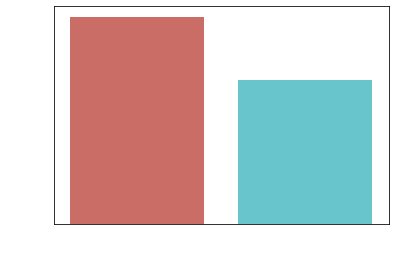

In [10]:
#Adding classification column to determine the sucess of a movie 
data['Classification'] = np.float64(0)
for i, row in data.iterrows():
        revenue = row['worldwide_gross_income']
        budget = row['budget']

        #sucess
        if   revenue > 2*budget:
             data.at[i,'Classification'] = np.float64(1)
        #fail
        elif revenue < 2*budget:
             data.at[i,'Classification'] = np.float64(0)
        #fail
        else:
             data.at[i,'Classification'] = np.float64(0)
display(data)
data['Classification'].value_counts()
sns.countplot(x='Classification',data=data,palette='hls')
pt.show()

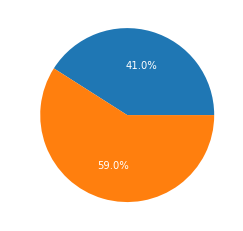

In [11]:
sucess_fail_ratio = data.Classification
classes = [0]*2
for sucess in sucess_fail_ratio:
    if sucess == 1:
        classes[0]+=1
    else:
        classes[1]+=1
        

COLOR = 'white'
pt.rcParams['text.color'] = COLOR
pt.rcParams['axes.labelcolor'] = COLOR
pt.rcParams['xtick.color'] = COLOR
pt.rcParams['ytick.color'] = COLOR
my_labels = 'Succesful Movie','Unsuccesful Movie'
pt.pie (classes, autopct='%1.1f%%',labels=my_labels)
pt.show()
data.to_csv('movies-checkpoint_FINAL.csv')

In [65]:
#SVM Technique
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import matplotlib.patches as mpatches
import sklearn
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

data = pd.read_csv('movies-checkpoint_FINAL.csv')
data.shape
data=data.drop(['Unnamed: 0'], axis=1)
display(data)
data = data.astype(float)


,year,duration,budget,usa_gross_income,worldwide_gross_income,Real GDP (trillions $),GDP Growth Rate %,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Sum_production_company_income,Sum_Director_income,Director_movies,Production_company_movies,avg Director revenue,avg Studio revenue,Classification
0,2001,118.0,48000000.0,47121859.0,76019048.0,13.262,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.601905e+07,619021436.0,10.0,1.0,6.190214e+07,7.601905e+06,0.0
1,2010,109.0,117000000.0,76423035.0,261989769.0,15.599,2.6,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.789968e+09,619021436.0,10.0,187.0,6.190214e+07,2.789968e+08,1.0
2,2013,126.0,120000000.0,132556852.0,414828246.0,16.495,1.8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.789968e+09,619021436.0,10.0,187.0,6.190214e+07,2.789968e+08,1.0
3,2017,137.0,97000000.0,226277068.0,619021436.0,18.108,2.4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.789968e+09,619021436.0,10.0,187.0,6.190214e+07,2.789968e+08,1.0
4,1990,104.0,20000000.0,21413502.0,21413502.0,9.366,1.9,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.789968e+09,255000211.0,13.0,187.0,1.961540e+07,2.146129e+08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,2017,113.0,3000000.0,1001305.0,3601603.0,18.108,2.4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.601603e+06,3601603.0,1.0,1.0,3.601603e+06,3.601603e+06,0.0
5365,2018,108.0,8000000.0,1400603.0,1404646.0,18.638,2.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.404646e+06,1404646.0,1.0,1.0,1.404646e+06,1.404646e+06,0.0
5366,2019,90.0,6000000.0,17300439.0,32893421.0,19.073,2.3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.289342e+07,32893421.0,1.0,1.0,3.289342e+07,3.289342e+07,1.0
5367,2018,126.0,4000000.0,1661096.0,64398132.0,18.638,2.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.439813e+07,64398132.0,1.0,1.0,6.439813e+07,6.439813e+07,1.0


In [66]:
#len(data)
#profitable = data[data['Classification'] == 1.0]
#unprofitable = data[data['Classification'] == 0.0]

#profitable_downsampled = resample(profitable, replace = False, n_samples = 1000, random_state =42)
#len(profitable_downsampled)

#unprofitable_downsampled = resample(unprofitable, replace = False, n_samples = 1000, random_state =42)
#len(unprofitable_downsampled)

In [67]:
#downsample = pd.concat([profitable_downsampled,unprofitable_downsampled])
#len(downsample)

In [68]:
X = data.drop(['Classification','worldwide_gross_income','usa_gross_income'],axis=1).copy()
pd.set_option('display.max_columns', None)
X.head()

,year,duration,budget,Real GDP (trillions $),GDP Growth Rate %,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Sum_production_company_income,Sum_Director_income,Director_movies,Production_company_movies,avg Director revenue,avg Studio revenue
0,2001.0,118.0,48000000.0,13.262,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.601905e+07,619021436.0,10.0,1.0,6.190214e+07,7.601905e+06
1,2010.0,109.0,117000000.0,15.599,2.6,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.789968e+09,619021436.0,10.0,187.0,6.190214e+07,2.789968e+08
2,2013.0,126.0,120000000.0,16.495,1.8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.789968e+09,619021436.0,10.0,187.0,6.190214e+07,2.789968e+08
3,2017.0,137.0,97000000.0,18.108,2.4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.789968e+09,619021436.0,10.0,187.0,6.190214e+07,2.789968e+08
4,1990.0,104.0,20000000.0,9.366,1.9,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.789968e+09,255000211.0,13.0,187.0,1.961540e+07,2.146129e+08


In [69]:
y = data['Classification'].copy()
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Classification, dtype: float64

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.20, random_state =0)
sc_X = StandardScaler()
x_train_scaled  = sc_X.fit_transform(x_train)
x_test_scaled = sc_X.transform(x_test)

In [71]:
svm = SVC(random_state=0)
svm.fit(x_train_scaled, y_train)

SVC(random_state=0)

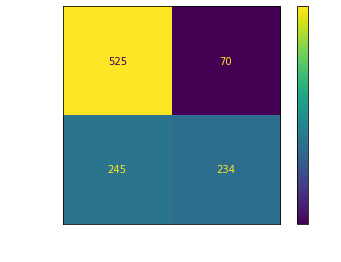

In [72]:
#First predction with no Cross Validation or any optimalization of parameters
#525/595 = 88.2% correctly classified for finansial success of a movie
#234/479 = 48.8% correctly classified for finansial failure of a movie
plot_confusion_matrix(svm, x_test_scaled, y_test, values_format='d', display_labels=["Sucess","Failure"])

In [18]:
param_grid = [{'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},]
optimal = GridSearchCV( SVC(),param_grid,cv=10,scoring='accuracy',verbose=0)

optimal.fit(x_train_scaled, y_train)
print(optimal.best_params_)

{'C': 10, 'gamma': 0.01}


In [73]:
#SVM CLASSIFIER
svm = SVC(random_state=0, C=1000, gamma=0.001, probability=True)
svm.fit(x_train_scaled, y_train)
prep_svm = svm.decision_function(x_test_scaled)


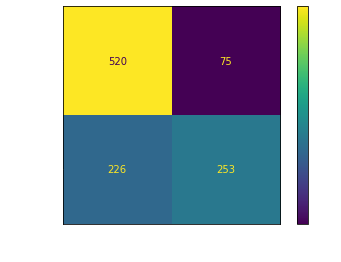

In [74]:
#First predction with no Cross Validation or any optimalization of paramiters
#520/595 = 87% correctly classified for finansial success of a movie
#253/479 = 52.8% correctly classified for finansial failure of a movie

plot_confusion_matrix(svm, x_test_scaled, y_test, values_format='d', display_labels=["Sucess","Failure"])



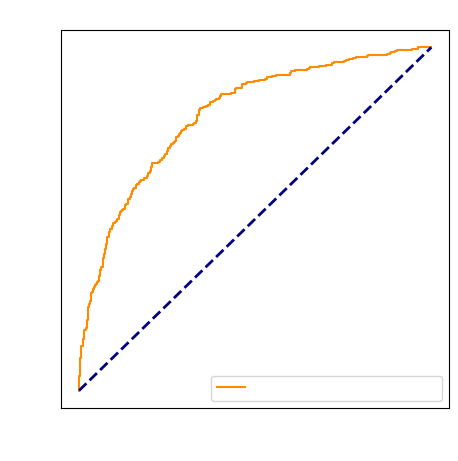

In [116]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, prep_svm)
auc_svm = auc(svm_fpr, svm_tpr)

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), prep_svm.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

pt.figure(figsize=(5,5),dpi=100)
pt.plot(svm_fpr, svm_tpr, color='darkorange', label='ROC curve (area = %0.3f)' % auc_svm)
pt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
pt.xlabel('False Positive Rate')
pt.ylabel('True Positive Rate')
pt.title('Receiver operating characteristic')
pt.legend(loc="lower right")
pt.show()


In [107]:
logm=LogisticRegression()
logm.fit(x_train_scaled,y_train)

LogisticRegression()

In [114]:
log_prediction=logm.predict(x_test_scaled)
print("Accuracy",(logm.score(x_test_scaled,y_test)))

Accuracy 0.7011173184357542


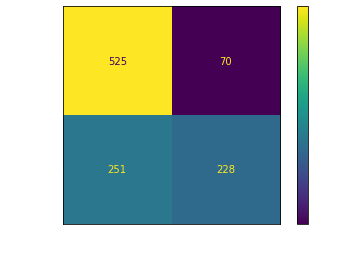

In [115]:
plot_confusion_matrix(logm, x_test_scaled, y_test, values_format='d', display_labels=["Sucess","Failure"])